# IMPORT LIBS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('INNHotelsGroup_pastdata.csv')
data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No


# Basic analysis

In [3]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB


In [4]:
df.shape

(27093, 12)

In [5]:
df.size

325116

In [6]:
# treat anomalies

In [7]:
# dropping booking id

df.drop('booking_id',axis = 1,inplace=True)

In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

lead_time
[  0  34  24  23  46  10  25  21   1 120  48  62   4  20  36  52 208  19
  13  55   3  30  94  27 196  41  12  70  14 129  51  53  78  31 175  18
  61   2  16  15 231  28 138  56   7  79   9  17 122  44 118  22   8 113
  45  38  11 307  32  71  47  69 111 145 205   5 176 132 135 149 144  88
 141 162   6 142 156 185  89  85 139 104 166 125 189  83 169 151  87  77
 108 160  90 152 153 245  72 159  73 165 133 157  95 164 126 102 106  35
  39 110 140  58 128 146  80 117 150 193  75 173 155  65 109  97 115  42
 181 215  98 103 148 143 158 167 187 127  76 195  82 136 131  91 194  93
  86  60 269  54  50 184 154  49 171 107  74 119  33 174 134  84  37 114
 112 180 101 240  92 163  43  64 161 147  26  99  40 200 105  66 172 170
 179 121 177 186 203  63 336  57 296 271 294 292 295 183 238 226 249 124
 285 201 100 213 202 199 178 278 192 188 206 191  59 130  81 210 261 212
  68 168 123 232 276 198 332 237 182 260 251 236 229 207 209 116 216 214
 217 190 274 218 197 220  96 222 233 247 

In [9]:
# converting arrival date into date time and extract year and month out of it 

In [10]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_date'].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: arrival_date, dtype: datetime64[ns]

In [11]:
import datetime as dt

In [12]:
# feature engineering

In [13]:
df['arrival_year'] = df['arrival_date'].dt.year
df['arrival_month'] = df['arrival_date'].dt.month

In [14]:
# converting required_car_parking_space into object (1 = yes, 0 = no)

In [15]:
df['required_car_parking_space'] = df['required_car_parking_space'].astype(object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   lead_time                   27093 non-null  int64         
 1   market_segment_type         27093 non-null  object        
 2   no_of_special_requests      27093 non-null  int64         
 3   avg_price_per_room          27093 non-null  float64       
 4   no_of_adults                27093 non-null  int64         
 5   no_of_weekend_nights        27093 non-null  int64         
 6   arrival_date                27093 non-null  datetime64[ns]
 7   required_car_parking_space  27093 non-null  object        
 8   no_of_week_nights           27093 non-null  int64         
 9   booking_status              27093 non-null  object        
 10  rebooked                    8857 non-null   object        
 11  arrival_year                27093 non-null  int64     

In [17]:
# Seperating Num and Cat columns 

In [18]:
num = df.select_dtypes(include = np.number).columns.to_list()
cat = df.select_dtypes(include = object).columns.to_list()

In [19]:
num

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'arrival_year',
 'arrival_month']

In [20]:
# STATS SUMMARY

In [21]:
df[num].describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,no_of_week_nights,arrival_year,arrival_month
count,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000,27093.000000
mean,81.605249,0.556454,101.025910,1.825822,0.778319,2.171373,2021.502455,5.172185
std,84.901428,0.743715,34.557289,0.512182,0.861787,1.386023,0.500003,2.965808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000
25%,14.000000,0.000000,79.000000,2.000000,0.000000,1.000000,2021.000000,3.000000
50%,55.000000,0.000000,97.000000,2.000000,1.000000,2.000000,2022.000000,5.000000
75%,118.000000,1.000000,119.000000,2.000000,1.000000,3.000000,2022.000000,6.000000
max,443.000000,5.000000,540.000000,4.000000,6.000000,17.000000,2022.000000,12.000000


In [22]:
df[cat].describe()

,market_segment_type,required_car_parking_space,booking_status,rebooked
count,27093,27093,27093,8857
unique,2,2,2,2
top,Online,0,Not Canceled,No
freq,18456,26311,18236,7092


### Inference:

* Target column : booking_status
* Converted Arrival date into date time and extracted year and month for the analysis 
* Avg price of booking, leadtime are right skewed


# DEEP ANALYSIS

## Understanding the target column

In [23]:
df['booking_status'].value_counts(normalize=True)*100

Not Canceled    67.308899
Canceled        32.691101
Name: booking_status, dtype: float64

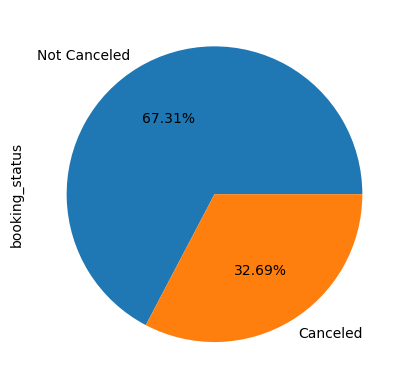

In [24]:
df['booking_status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

Balanced data so we can proceed with this( while building models we can encode Not canceled as 0, canceled as 1)

## Missing values

In [25]:
df.isnull().sum()

lead_time                         0
market_segment_type               0
no_of_special_requests            0
avg_price_per_room                0
no_of_adults                      0
no_of_weekend_nights              0
arrival_date                      0
required_car_parking_space        0
no_of_week_nights                 0
booking_status                    0
rebooked                      18236
arrival_year                      0
arrival_month                     0
dtype: int64

* We will analysis the rebooked column and we will drop it later while building the model

### Univariate analysis(Num)

In [26]:
plt.rcParams['figure.figsize'] = [20,10]

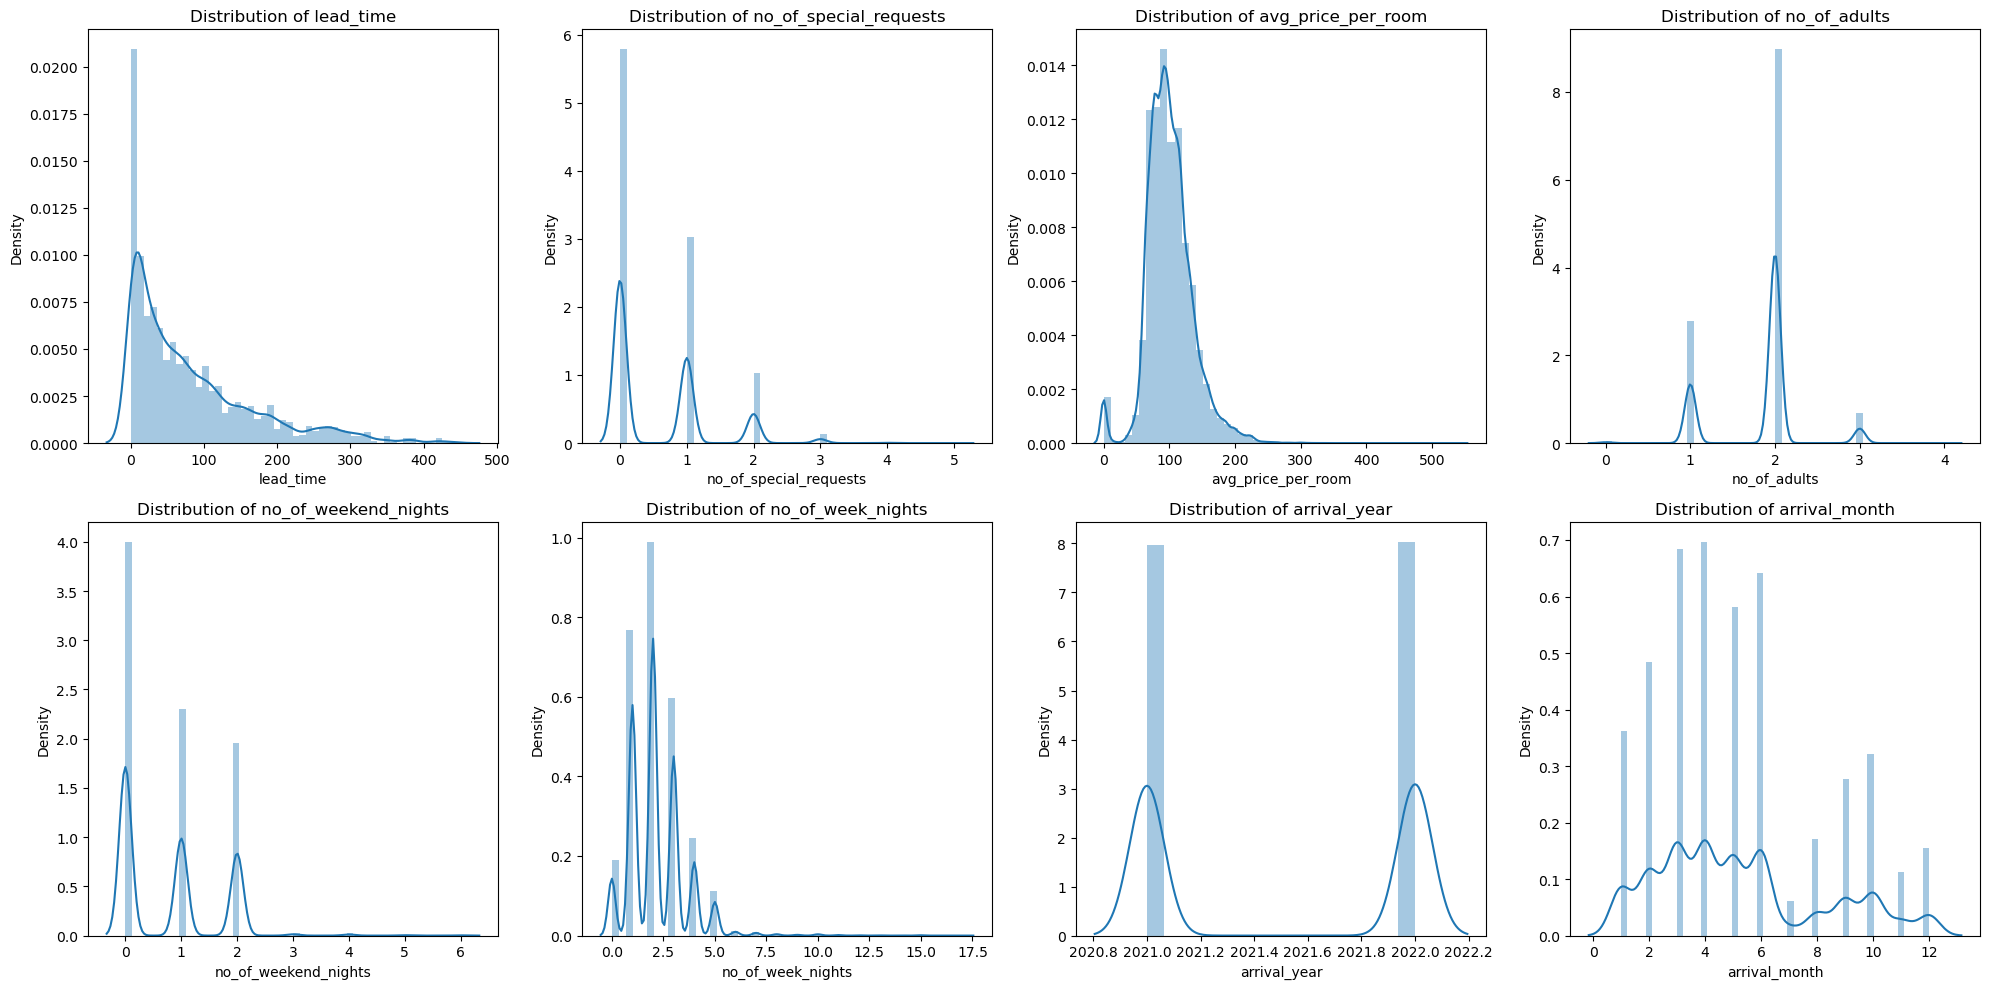

In [27]:
t=1
for i in num:
    plt.subplot(2,4,t)
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    t+=1
    
plt.tight_layout()
plt.show()

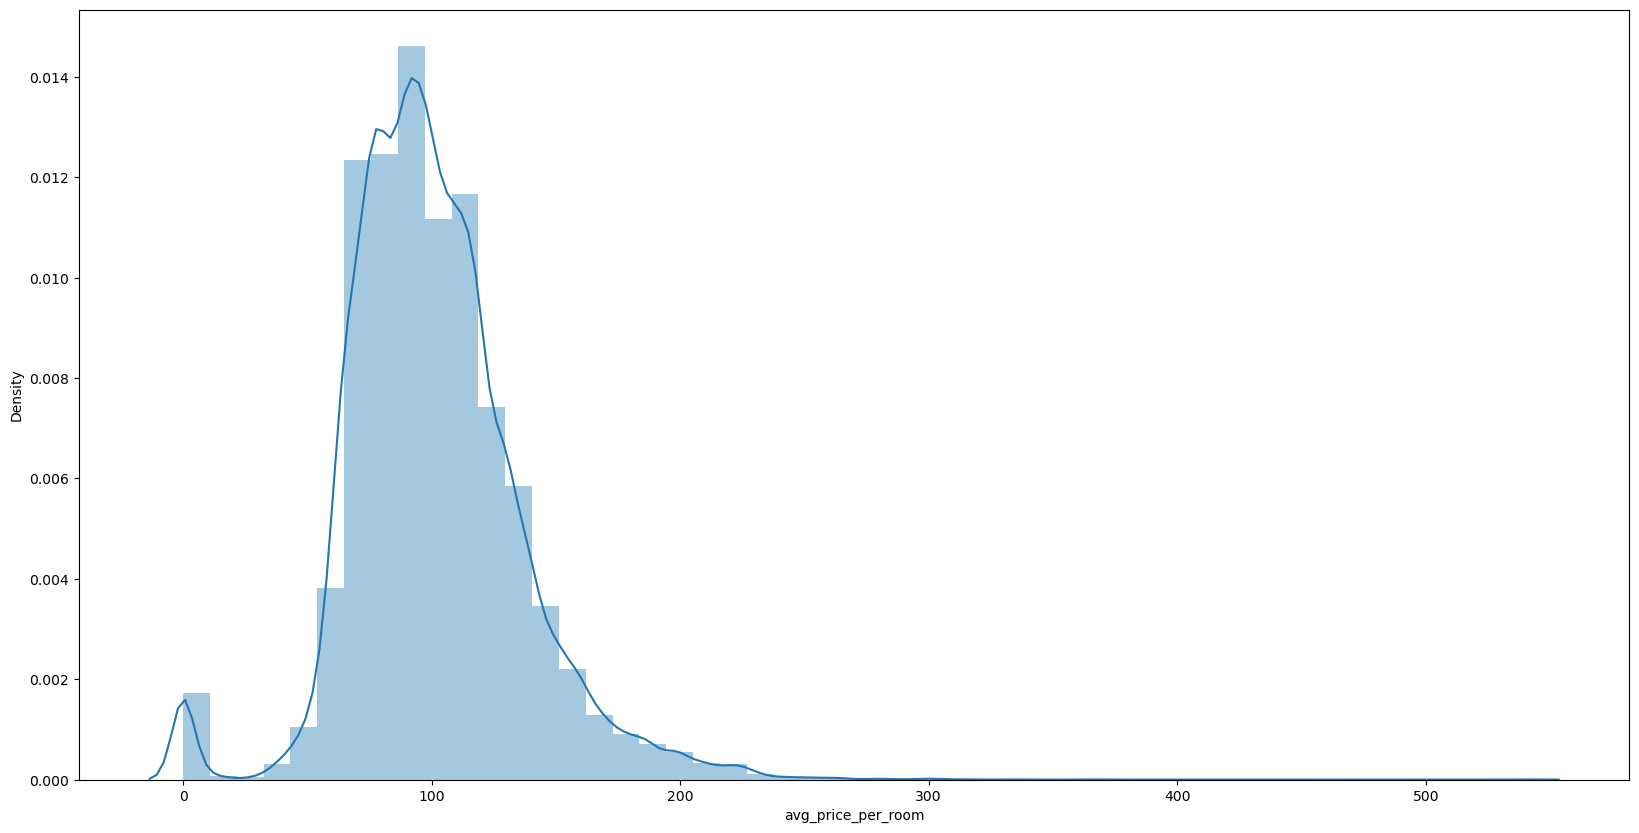

In [28]:
sns.distplot(df['avg_price_per_room'])
plt.show()

* There are zeros in the avg price column , considering them as a pattern we are not dropping or treating these values 
* More bookings are in 4th month of the year
* Maajority of the bopokings are for 2 adults
* Many are not spending weekend nights in the hotel and etc...

### Univariate analysis(Cat)

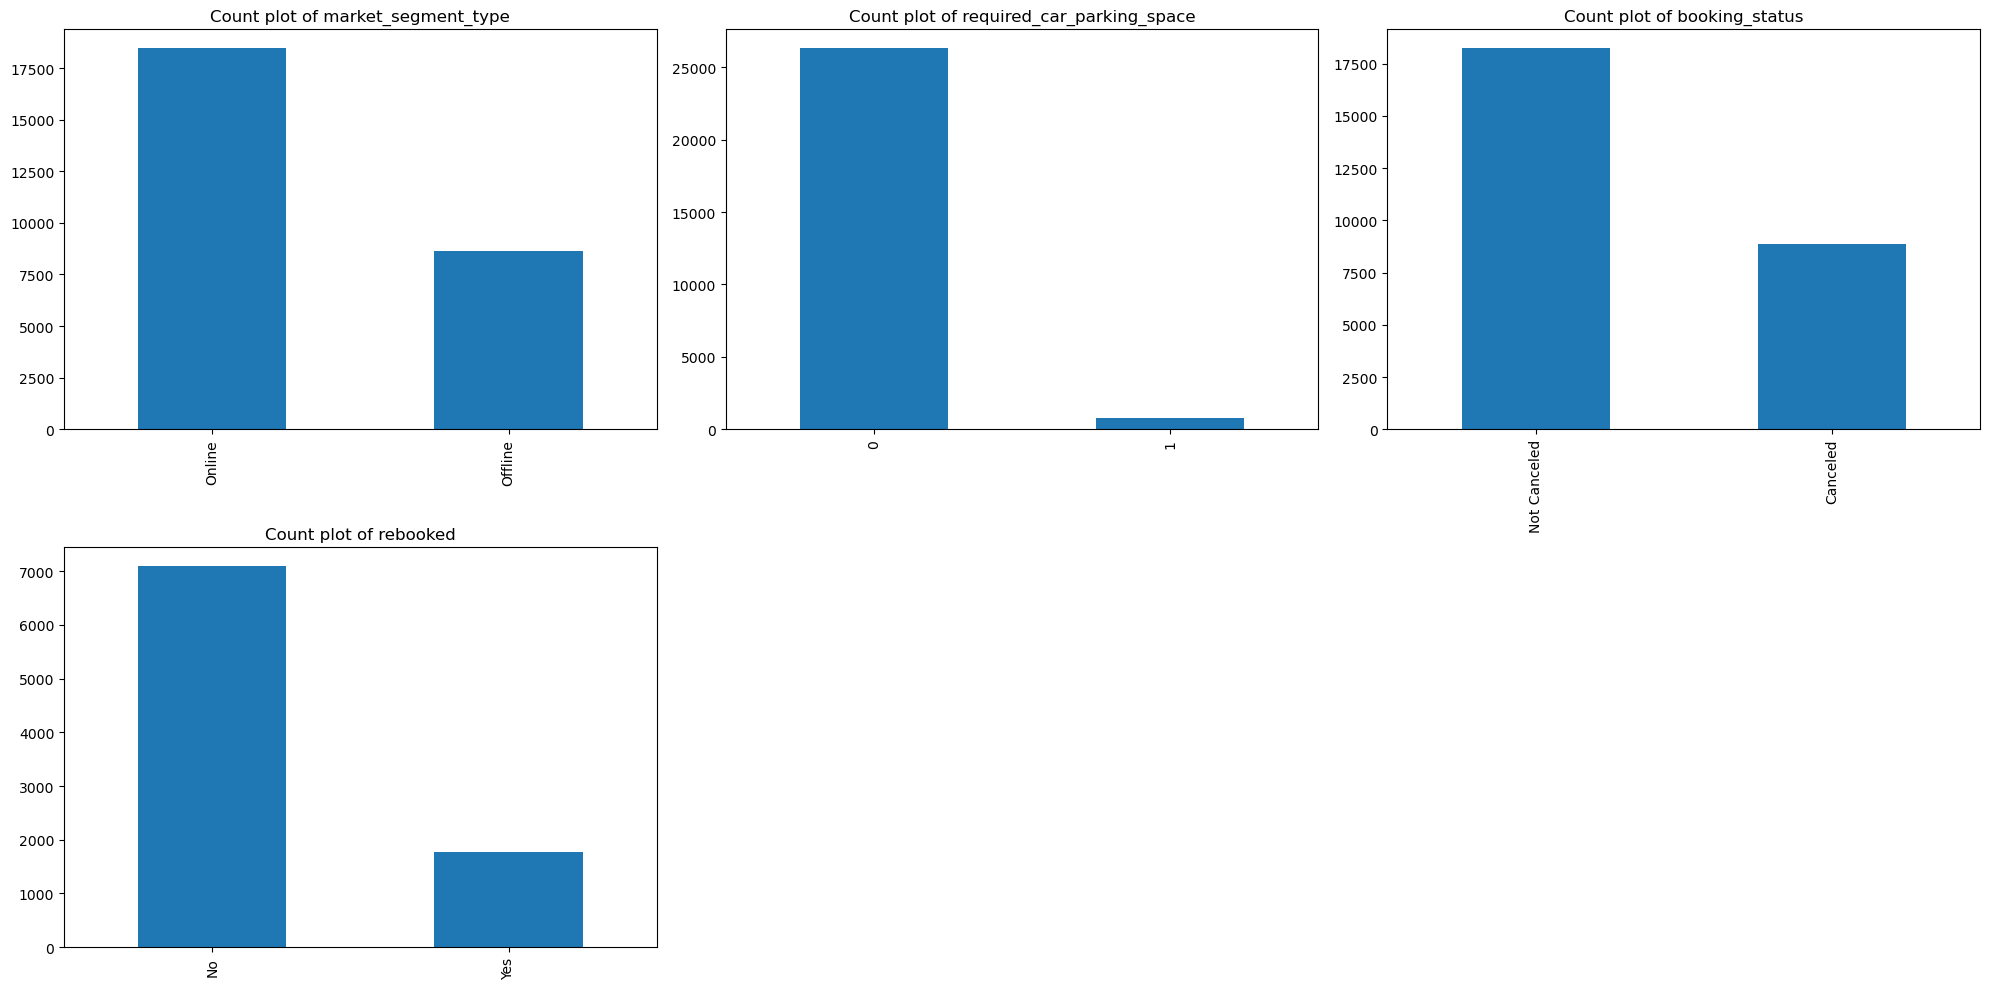

In [29]:
t=1
for i in cat:
    plt.subplot(2,3,t)
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Count plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

In [30]:
can = df[df['rebooked'] == 'Yes']
can.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked,arrival_year,arrival_month
34,53,Online,0,149.40,2,2,2021-01-01,0,2,Canceled,Yes,2021,1
76,38,Online,1,207.90,2,2,2021-01-01,0,3,Canceled,Yes,2021,1
102,69,Online,0,135.90,2,2,2021-01-01,0,0,Canceled,Yes,2021,1
109,205,Online,1,90.95,1,2,2021-01-05,0,8,Canceled,Yes,2021,1
114,132,Online,0,105.83,2,0,2021-01-05,0,4,Canceled,Yes,2021,1


<Axes: xlabel='arrival_month', ylabel='count'>

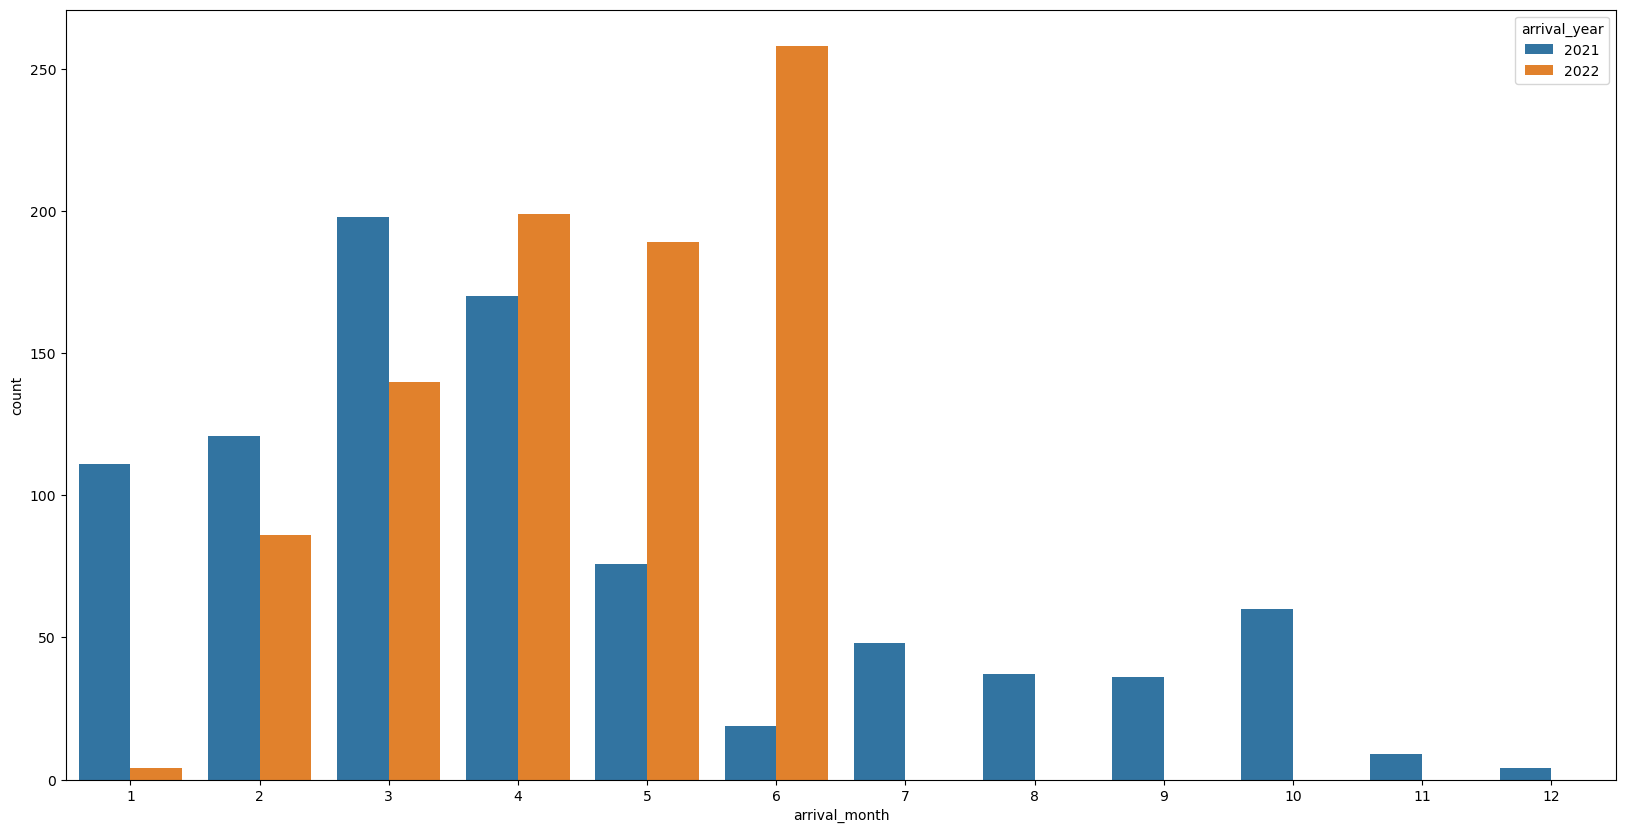

In [31]:
sns.countplot(x= can['arrival_month'], hue =can['arrival_year'])

* In 2022, cancalation and rebooked happened more in June and in 2021, it was in March 
* There are nearly 1700 bookings have been cancelled and re booked 

### Check the outliers 

In [32]:
out = ['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights']

In [33]:
out

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights']

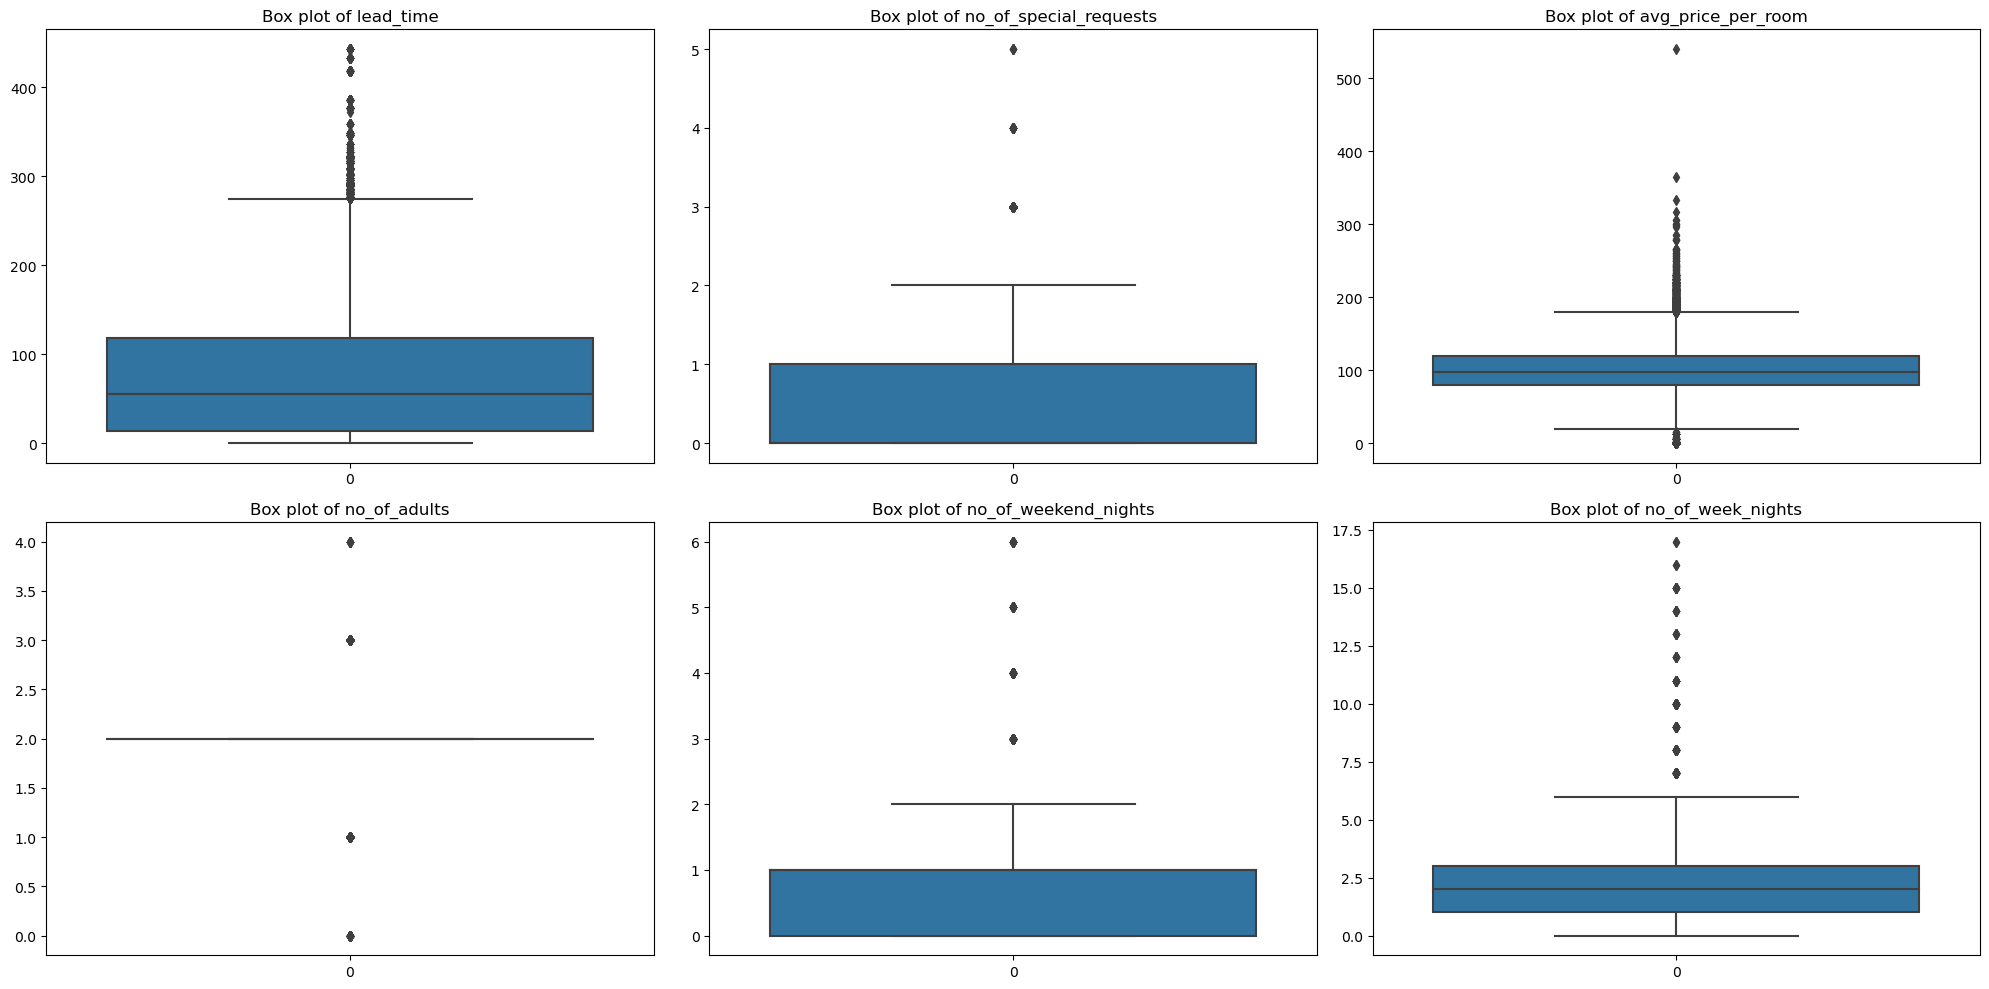

In [34]:
t=1
for i in out:
    plt.subplot(2,3,t)
    sns.boxplot(df[i])
    plt.title(f'Box plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

In [35]:
q3 = df[out].quantile(0.75)
q1 = df[out].quantile(0.25)

iqr = q3 - q1

lw = q1 - (1.5*iqr)
uw = q3 + (1.5*iqr)


In [36]:
outliers = df[((df[out] < lw) | (df[out] > uw)).any(axis=1)]

In [37]:
len(outliers) / len(df)*100

36.496512014173405

* Nearly 36% of data are outliers so we will consider them for furthur analysis

### Bi variate ( Num vs Target)

In [38]:
out

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights']

In [39]:
for i in out:
    print(f'{i} for each target labels')
    print(df.groupby('booking_status')[i].agg(['mean','median']))
    print()

lead_time for each target labels
                      mean  median
booking_status                    
Canceled        134.035791   112.0
Not Canceled     56.140382    36.0

no_of_special_requests for each target labels
                    mean  median
booking_status                  
Canceled        0.305069     0.0
Not Canceled    0.678548     0.0

avg_price_per_room for each target labels
                      mean  median
booking_status                    
Canceled        109.722152   107.1
Not Canceled     96.802253    93.0

no_of_adults for each target labels
                    mean  median
booking_status                  
Canceled        1.903240     2.0
Not Canceled    1.788221     2.0

no_of_weekend_nights for each target labels
                    mean  median
booking_status                  
Canceled        0.869933     1.0
Not Canceled    0.733823     0.0

no_of_week_nights for each target labels
                    mean  median
booking_status                  
Canceled   

* LEAD TIME, NO of spl request, avg price has some pattern where as no of adults, weekedn nights and weeday nights columns has less pattern

In [40]:
# plot - barplot, kdeplot, lineplot

### Bi variate ( Cat vs Target)

In [41]:
for i in cat:
    if i != 'booking_status':
        print(f'{i} for each target labels')
        print('----------')
        print(pd.crosstab(df['booking_status'],df[i]))
        print()

market_segment_type for each target labels
----------
market_segment_type  Offline  Online
booking_status                      
Canceled                2589    6268
Not Canceled            6048   12188

required_car_parking_space for each target labels
----------
required_car_parking_space      0    1
booking_status                        
Canceled                     8792   65
Not Canceled                17519  717

rebooked for each target labels
----------
rebooked          No   Yes
booking_status            
Canceled        7092  1765



* More cancellation are done by online booking. Pople with no parking lots are cancelling the booking(more likely)

In [42]:
# countplot(x , hue)

### Multicollinearity

In [43]:
out

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights']

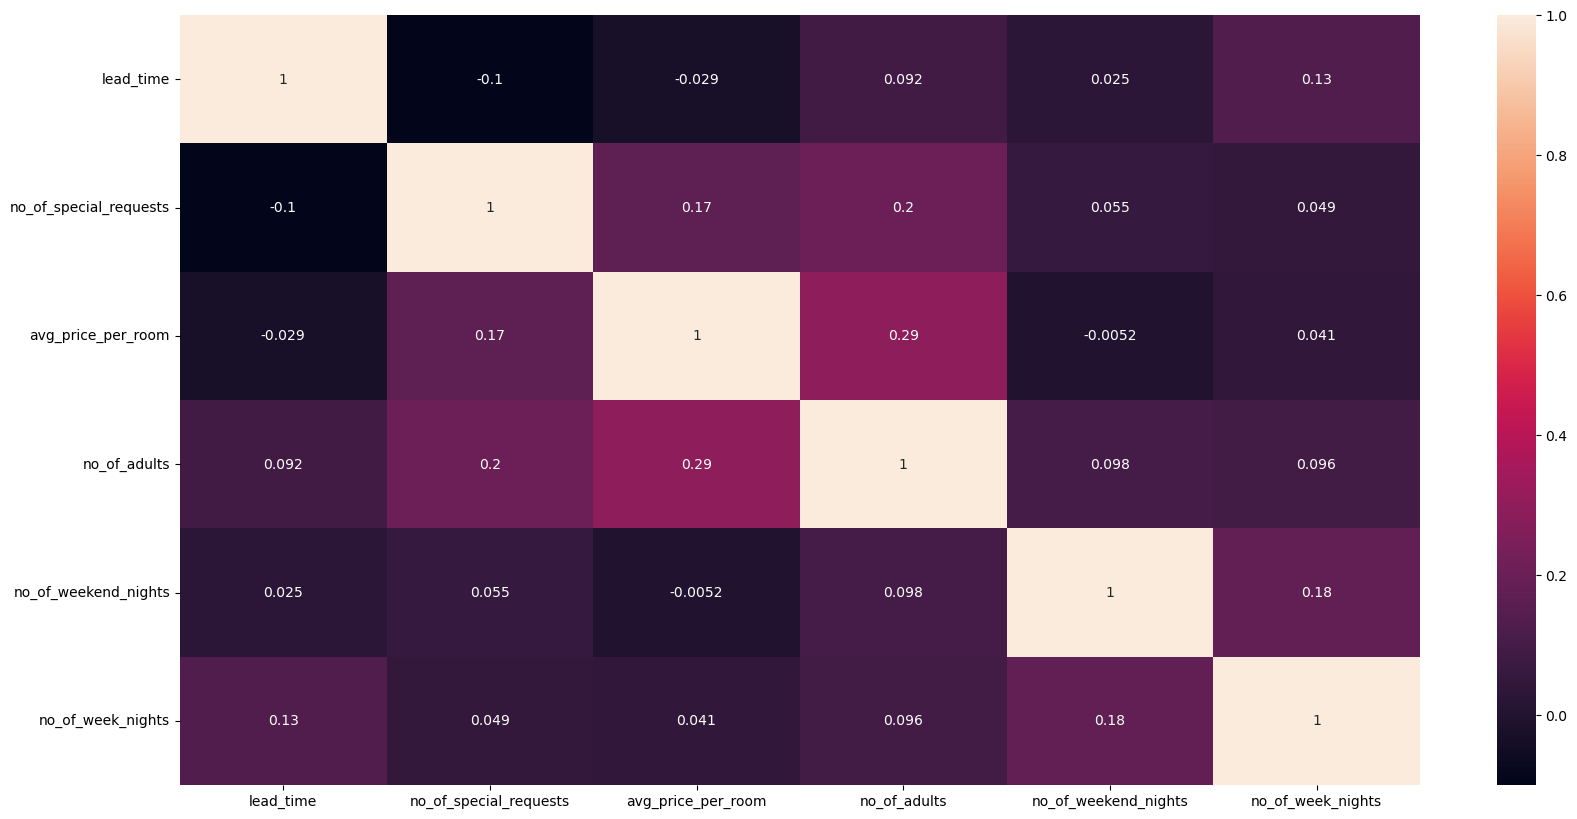

In [44]:
sns.heatmap(df[out].corr(),annot=True)
plt.show()

* No of adults has slight positive relation with avg price per room
* others shows very week relation(no relation)

In [45]:
pd.crosstab(df['arrival_year'],df['booking_status'])

booking_status,Canceled,Not Canceled
arrival_year,,
2021,4469,9011
2022,4388,9225


In [46]:
pd.crosstab(df['arrival_month'],df['booking_status'])

booking_status,Canceled,Not Canceled
arrival_month,,
1,582,1576
2,1037,1845
3,1690,2390
4,1846,2310
5,1329,2132
6,1390,2430
7,243,120
8,185,829
9,182,1467


## Inferential STATS 

In [47]:
# Num vs TARGET (95% OF confidence), Assume data is normal and of equal variance

# T-test for independence 

In [48]:
df['booking_status'].unique()

array(['Not Canceled', 'Canceled'], dtype=object)

In [49]:
from scipy import stats

In [50]:
for i in out:
    print(f'{i} vs booking_status')
    samp1 = df[df['booking_status'] == 'Canceled'][i]
    samp2 = df[df['booking_status'] == 'Not Canceled'][i]
    
    test_stats, p_value = stats.ttest_ind(samp1, samp2)
    print('Pvalue :', p_value)
    if p_value < 0.05:
        print(f'Both {i} and booking_status are dependent')
    else:
        print(f'Both {i} and booking_status are independent')
    print('--------------')

lead_time vs booking_status
Pvalue : 0.0
Both lead_time and booking_status are dependent
--------------
no_of_special_requests vs booking_status
Pvalue : 0.0
Both no_of_special_requests and booking_status are dependent
--------------
avg_price_per_room vs booking_status
Pvalue : 4.562650510904138e-186
Both avg_price_per_room and booking_status are dependent
--------------
no_of_adults vs booking_status
Pvalue : 1.0353570188076589e-67
Both no_of_adults and booking_status are dependent
--------------
no_of_weekend_nights vs booking_status
Pvalue : 2.711099357094065e-34
Both no_of_weekend_nights and booking_status are dependent
--------------
no_of_week_nights vs booking_status
Pvalue : 1.037842985768642e-49
Both no_of_week_nights and booking_status are dependent
--------------


In [51]:
# Cat vs TARGET (95% OF confidence)
# Chi square - test for independence 

In [52]:
for i in cat:
    print(f'{i} vs booking_status')

    obs = pd.crosstab(df['booking_status'],df[i])
    
    test_stats, p_value, dof, exp = stats.chi2_contingency(obs)
    print('Pvalue :', p_value)
    if p_value < 0.05:
        print(f'Both {i} and booking_status are dependent')
    else:
        print(f'Both {i} and booking_status are independent')
    print('--------------')

market_segment_type vs booking_status
Pvalue : 7.806389643886697e-11
Both market_segment_type and booking_status are dependent
--------------
required_car_parking_space vs booking_status
Pvalue : 5.626905783478662e-49
Both required_car_parking_space and booking_status are dependent
--------------
booking_status vs booking_status
Pvalue : 0.0
Both booking_status and booking_status are dependent
--------------
rebooked vs booking_status
Pvalue : 1.0
Both rebooked and booking_status are independent
--------------


In [53]:
# Removing insignificant columns

df.drop(['arrival_date','arrival_year','arrival_month','rebooked'], axis = 1, inplace = True)

## Encoding

In [54]:
cat

['market_segment_type',
 'required_car_parking_space',
 'booking_status',
 'rebooked']

In [55]:
df['market_segment_type'] = df['market_segment_type'].replace({'Online':0, 'Offline':1})

In [56]:
df['required_car_parking_space'] = df['required_car_parking_space'].astype(int)

In [57]:
df['booking_status'] = df['booking_status'].replace({'Not Canceled':0, 'Canceled':1})

## Transformation 

In [58]:
df[out].skew()

lead_time                 1.414003
no_of_special_requests    1.208995
avg_price_per_room        0.618991
no_of_adults             -0.365445
no_of_weekend_nights      0.824426
no_of_week_nights         1.765840
dtype: float64

In [59]:
for i in out:
    print(df[i].unique())
    print()

[  0  34  24  23  46  10  25  21   1 120  48  62   4  20  36  52 208  19
  13  55   3  30  94  27 196  41  12  70  14 129  51  53  78  31 175  18
  61   2  16  15 231  28 138  56   7  79   9  17 122  44 118  22   8 113
  45  38  11 307  32  71  47  69 111 145 205   5 176 132 135 149 144  88
 141 162   6 142 156 185  89  85 139 104 166 125 189  83 169 151  87  77
 108 160  90 152 153 245  72 159  73 165 133 157  95 164 126 102 106  35
  39 110 140  58 128 146  80 117 150 193  75 173 155  65 109  97 115  42
 181 215  98 103 148 143 158 167 187 127  76 195  82 136 131  91 194  93
  86  60 269  54  50 184 154  49 171 107  74 119  33 174 134  84  37 114
 112 180 101 240  92 163  43  64 161 147  26  99  40 200 105  66 172 170
 179 121 177 186 203  63 336  57 296 271 294 292 295 183 238 226 249 124
 285 201 100 213 202 199 178 278 192 188 206 191  59 130  81 210 261 212
  68 168 123 232 276 198 332 237 182 260 251 236 229 207 209 116 216 214
 217 190 274 218 197 220  96 222 233 247 263 225 20

In [60]:
from sklearn.preprocessing import PowerTransformer

In [61]:
p = PowerTransformer(standardize=False)

In [62]:
df['lead_time'] = p.fit_transform(df[['lead_time']])

In [63]:
df['avg_price_per_room'] = p.fit_transform(df[['avg_price_per_room']])

In [64]:
df

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status
0,0.000000,0,0,54.957367,1,1,0,0,0
1,5.760954,0,2,77.211577,2,2,0,0,0
2,4.968783,0,1,47.277444,2,2,0,0,0
3,4.877175,0,0,54.769296,1,2,0,0,0
4,6.512590,0,1,90.254468,2,2,0,3,1
...,...,...,...,...,...,...,...,...,...
27088,9.140106,1,0,54.940273,2,1,0,3,1
27089,3.457666,0,1,84.707641,2,0,0,3,1
27090,5.830384,0,0,73.288179,2,0,0,3,1
27091,7.579388,0,1,80.621355,2,0,0,2,1


# Model Building

In [65]:
# considering the entire data as training data

In [66]:
x = df.drop('booking_status',axis = 1)

In [67]:
x.shape

(27093, 8)

In [68]:
x.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights'],
      dtype='object')

In [69]:
y = df[['booking_status']]

In [70]:
# Base model - STATS

In [71]:
import statsmodels.api as sma

In [72]:
base1 = sma.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.507540
         Iterations 7


In [73]:
base1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27093
Model:                          Logit   Df Residuals:                    27085
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.1969
Time:                        10:09:05   Log-Likelihood:                -13751.
converged:                       True   LL-Null:                       -17122.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
lead_time                      0.3034      0.005     56.961      0.000       0.293       0.314
market_segment_type           -1.9071      0.039    -49.362      0.000      -1.983      -1.831
no_of_special_requests        -1.3386      0.027    -49.107      0.000      -1.392      -1.285
avg_price_per_room             0.0012      0.001      1.723      0.085      -0.000       0.003
no_of_adults                  -0.7149      0.028    -25.517      0.000      -0.770      -0.660
no_of_weekend_nights           0.0381      0.017      2.186      0.029       0.004       0.072
required_car_parking_space    -1.7630      0.139    -12.689      0.000      -2.035      -1.491
no_of_week_nights             -0.1326      0.011    -11.993      0.000      -0.154      -0.111
==============================================================================================
"""

In [74]:
# preparing test data 

In [75]:
test = pd.read_csv('INNHotelsGroup_newdata.csv')
test

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled
...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,Canceled
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,Canceled
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,Canceled
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,Canceled


In [76]:
# dropping unwanted columns 

test.drop(['booking_id','arrival_date'],axis=1,inplace = True)

In [77]:
# Encode the columns 

In [78]:
test['market_segment_type'] = test['market_segment_type'].replace({'Online':0, 'Offline':1})

In [79]:
test['booking_status'] = test['booking_status'].replace({'Not Canceled':0, 'Canceled':1})

In [80]:
# Transformation

In [81]:
p = PowerTransformer(standardize=False)

In [82]:
test['lead_time'] = p.fit_transform(test[['lead_time']])

In [83]:
test['avg_price_per_room'] = p.fit_transform(test[['avg_price_per_room']])

In [84]:
test

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status
0,2.347833,0,1,57.972265,1,0,1,1,0
1,18.399249,0,2,58.307105,2,2,0,2,0
2,9.811614,0,1,69.218724,2,1,1,2,0
3,18.275113,1,0,43.120880,2,0,0,1,0
4,14.066941,1,1,60.208996,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...
3578,24.211238,0,1,59.500084,2,0,0,1,1
3579,24.436408,0,0,56.677361,2,2,0,4,1
3580,20.600195,0,2,64.182104,2,2,0,3,1
3581,22.115548,0,0,66.429319,2,0,0,3,1


In [85]:
x_test = test.drop('booking_status',axis=1)
y_test = test[['booking_status']]

In [86]:
# predicting the model

In [87]:
ypred1 = base1.predict(x_test)

In [88]:
ypred1 = (ypred1 >= 0.5).astype(int)
ypred1

0       0
1       1
2       0
3       1
4       0
       ..
3578    1
3579    1
3580    1
3581    1
3582    1
Length: 3583, dtype: int32

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [96]:
summary = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1 score'])
summary.index.name ='Model name'

In [98]:
def metric(model, ytest, ypred ):
    
    acc = accuracy_score(ytest,ypred)
    pre = precision_score(ytest,ypred)
    rec = recall_score(ytest,ypred)
    f1 = f1_score(ytest,ypred)
    

    summary.loc[model]=[acc,pre,rec,f1]
    
    return summary
    

In [99]:
metric('Logit without constant',y_test,ypred1)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407


In [100]:
# Base model with constant

x_c = sma.add_constant(x)
x_testc = sma.add_constant(x_test)

In [101]:
base2 = sma.Logit(y,x_c).fit()
base2.summary()

Optimization terminated successfully.
         Current function value: 0.440995
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27093
Model:                          Logit   Df Residuals:                    27084
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.3022
Time:                        10:09:57   Log-Likelihood:                -11948.
converged:                       True   LL-Null:                       -17122.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2007      0.100    -51.843      0.000      -5.397      -5.004
lead_time                      0.4099      0.006     64.869      0.000       0.398       0.422
market_segment_type           -1.6480      0.042    -39.628      0.000      -1.730      -1.567
no_of_special_requests        -1.4782      0.030    -49.559      0.000      -1.537      -1.420
avg_price_per_room             0.0345      0.001     34.009      0.000       0.032       0.036
no_of_adults                   0.1914      0.034      5.572      0.000       0.124       0.259
no_of_weekend_nights           0.1732      0.019      9.242      0.000       0.136       0.210
required_car_parking_space    -1.8569      0.148    -12.522      0.000      -2.148      -1.566
no_of_week_nights             -0.0026      0.012     -0.218      0.827      -0.026       0.021
==============================================================================================
"""

In [102]:
ypred2 = base2.predict(x_testc)

In [103]:
ypred2 = (ypred2>=0.5).astype(int)

In [104]:
metric('Logit with constant', y_test, ypred2)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407
Logit with constant,0.614011,0.461731,0.920000,0.614871


In [106]:
# SKLEARN - LOGISTIC MODEL

In [107]:
from sklearn.linear_model import LogisticRegression

In [109]:
lg = LogisticRegression()
lg

LogisticRegression()

In [110]:
model3 = lg.fit(x,y)

In [112]:
ypred3 = model3.predict(x_test)
ypred3

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [113]:
metric('Logistic-SKLEARN',y_test, ypred3)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407
Logit with constant,0.614011,0.461731,0.920000,0.614871
Logistic-SKLEARN,0.612057,0.460384,0.920000,0.613674


In [105]:
# Decision Tree Model 

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt = DecisionTreeClassifier(random_state=42)

In [117]:
model4 = dt.fit(x,y)

In [120]:
ypred4 = model4.predict(x_test)

In [121]:
metric('Decision Tree',y_test, ypred4)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407
Logit with constant,0.614011,0.461731,0.920000,0.614871
Logistic-SKLEARN,0.612057,0.460384,0.920000,0.613674
Decision Tree,0.663969,0.498960,0.800000,0.614597


In [122]:
# Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf = RandomForestClassifier(random_state=42)

In [125]:
model5 = rf.fit(x,y)

In [126]:
ypred5 = model5.predict(x_test)

In [127]:
metric('Random Forest',y_test,ypred5)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407
Logit with constant,0.614011,0.461731,0.920000,0.614871
Logistic-SKLEARN,0.612057,0.460384,0.920000,0.613674
Decision Tree,0.663969,0.498960,0.800000,0.614597
Random Forest,0.668992,0.503375,0.870000,0.637752


In [129]:
# PRE PRUNING - DECISION TREE

In [130]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)

In [131]:
model6 = dt.fit(x,y)

In [132]:
ypred6 = model6.predict(x_test)

In [133]:
metric('Decision Tree - Pruning', y_test, ypred6)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407
Logit with constant,0.614011,0.461731,0.920000,0.614871
Logistic-SKLEARN,0.612057,0.460384,0.920000,0.613674
Decision Tree,0.663969,0.498960,0.800000,0.614597
Random Forest,0.668992,0.503375,0.870000,0.637752
Decision Tree - Pruning,0.689366,0.524424,0.778333,0.626635


In [134]:
# Grid Search CV

In [135]:
from sklearn.model_selection import GridSearchCV

In [137]:
par = {'n_estimators':[50,60],'max_depth':[5,6],'min_samples_split':[2,3]}

In [138]:
grid = GridSearchCV(rf, param_grid=par, cv =2, scoring='f1')

In [139]:
grid.fit(x,y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6], 'min_samples_split': [2, 3],
                         'n_estimators': [50, 60]},
             scoring='f1')

In [140]:
grid.best_params_

{'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 60}

In [141]:
rf = RandomForestClassifier(n_estimators=60,max_depth=6, min_samples_split=3,random_state=42)

In [142]:
model7 = rf.fit(x,y)

In [143]:
ypred7 = model7.predict(x_test)

In [144]:
metric('Tuned Random Forest',y_test,ypred7)

,Accuracy,Precision,Recall,F1 score
Model name,,,,
Logit without constant,0.634385,0.475468,0.888333,0.619407
Logit with constant,0.614011,0.461731,0.920000,0.614871
Logistic-SKLEARN,0.612057,0.460384,0.920000,0.613674
Decision Tree,0.663969,0.498960,0.800000,0.614597
Random Forest,0.668992,0.503375,0.870000,0.637752
Decision Tree - Pruning,0.689366,0.524424,0.778333,0.626635
Tuned Random Forest,0.668992,0.503469,0.846667,0.631448
